## Loan Case Classifier

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Overview of given dataset:

# Data set: Loan_train.csv

# It contains past loan details of 346 customers

In [3]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2019-10-02 20:21:14--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.006s  

2019-10-02 20:21:14 (3.98 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [4]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


# date time object conversion:

In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data pre-processing

In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

## conclusion 1: 260 people out of 346 has paid off their loans.

In [7]:
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('rainbow')

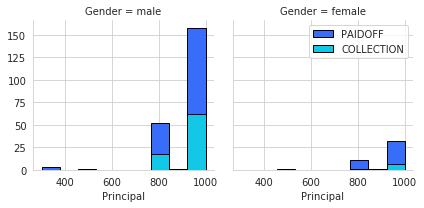

In [8]:
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status",  col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

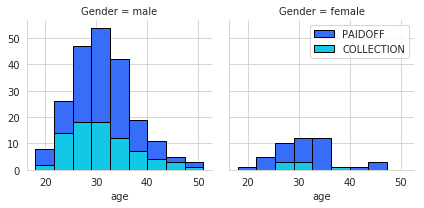

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

## Day of the week people get loans:

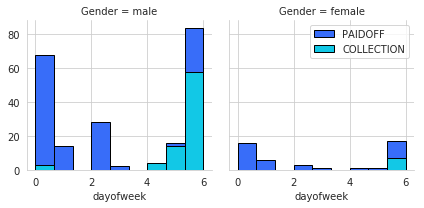

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status",  col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

## conclusion 2: People who get loans after 3 days of the start of the week,does not pay off the loans.

## binarization

In [11]:
df['lastdays'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,lastdays
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

## conclusion 3: women pays off loan,most of the times(86%)

In [13]:
df['Gender'] = df.Gender.map({'male':1, 'female':0})
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,lastdays
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,1,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,0,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,1,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,0,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,1,4,1


In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

## Master or above: 50% chance

# One hot encoding:(dummy variables)

In [15]:

df[['Principal','terms','age','Gender','education']]

,Principal,terms,age,Gender,education
0,1000,30,45,1,High School or Below
1,1000,30,33,0,Bechalor
2,1000,15,27,1,college
3,1000,30,28,0,college
4,1000,30,29,1,college
5,1000,30,36,1,college
6,1000,30,28,1,college
7,800,15,26,1,college
8,300,7,29,1,college
9,1000,15,39,1,High School or Below


In [16]:
Feature = df[['Principal','terms','age','Gender','lastdays']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,lastdays,Bechalor,High School or Below,college
0,1000,30,45,1,0,0,1,0
1,1000,30,33,0,0,1,0,0
2,1000,15,27,1,0,0,0,1
3,1000,30,28,0,1,0,0,1
4,1000,30,29,1,1,0,0,1


## feature selection

In [17]:
X = Feature.values
X[0:5]

array([[1000,   30,   45,    1,    0,    0,    1,    0],
       [1000,   30,   33,    0,    0,    1,    0,    0],
       [1000,   15,   27,    1,    0,    0,    0,    1],
       [1000,   30,   28,    0,    1,    0,    0,    1],
       [1000,   30,   29,    1,    1,    0,    0,    1]])

In [18]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [19]:
set(y)

{'COLLECTION', 'PAIDOFF'}

In [20]:
X.shape

(346, 8)

## Data normalization:

In [21]:
X = preprocessing.StandardScaler().fit_transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.51578458,  0.92071769,  2.33152555,  0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148, -2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055,  0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188, -2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 ,  0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

## Model building:classifier

## KNN ALGORITHM:

## Finding best k,by splitting the given train data set into test and train model!

In [22]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [23]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import accuracy_score as a_score

In [24]:
Ks = 30
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):  
    neigh = knn(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = a_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

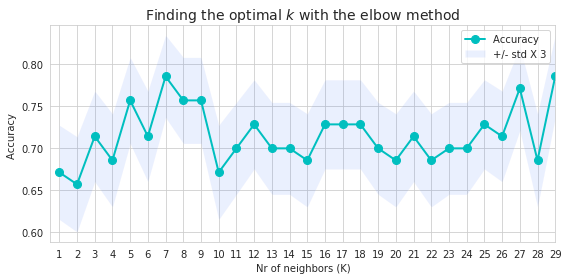

In [25]:
plt.figure(figsize=(8,4))
plt.plot(range(1,Ks),mean_acc,'co-', linewidth=2, markersize=8)
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- std X 3'))
plt.xlim(0.5,20.5)
plt.xticks(range(1,30))
plt.title('Finding the optimal $k$ with the elbow method', size=14)
plt.ylabel('Accuracy ')
plt.xlabel('Nr of neighbors (K)')
plt.tight_layout()
plt.show()

In [26]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.7857142857142857 with k= 7


## implement knn with k_value 7

In [27]:
kNN_model = knn(n_neighbors=7).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [28]:
yhat = kNN_model.predict(X_test)

In [29]:
print("Train set accuracy: ", a_score(y_train, kNN_model.predict(X_train)))
print("Test set accuracy: ", a_score(y_test, kNN_model.predict(X_test)))

Train set accuracy:  0.8079710144927537
Test set accuracy:  0.7857142857142857


In [30]:
from sklearn.metrics import f1_score, jaccard_similarity_score
print('F1 score: ', f1_score(y_test, kNN_model.predict(X_test), average='weighted'))
print('Jaccard similarity score: ', jaccard_similarity_score(y_test, kNN_model.predict(X_test)))

F1 score:  0.7766540244416351
Jaccard similarity score:  0.7857142857142857


## Decision Tree algorithm: 

## Normalization is not required!

In [31]:
Xdt = Feature.values
X_trainset, X_testset, y_trainset, y_testset = tts(Xdt, y, test_size=0.2, random_state=3)

## gridsearchCV

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

param_grid = {'max_depth': np.arange(3, 10), 'max_features':np.arange(2, 9), 'criterion':['gini','entropy']}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, iid=False)
grid.fit(X_trainset, y_trainset)
print('Best params: {}'.format(grid.best_params_))
print('Best score: {}'.format(grid.best_score_))
final_tree = grid.best_estimator_

Best params: {'criterion': 'gini', 'max_depth': 3, 'max_features': 3}
Best score: 0.7646232439335888


In [33]:
final_tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [34]:
from sklearn.metrics import accuracy_score
print("DecisionTrees's Accuracy: ", accuracy_score(y_testset, final_tree.predict(X_testset)))

DecisionTrees's Accuracy:  0.6714285714285714


In [35]:
print('F1 score: ', f1_score(y_test, final_tree.predict(X_testset), average='weighted'))
print('Jaccard similarity score: ', jaccard_similarity_score(y_testset, final_tree.predict(X_testset)))

F1 score:  0.6914285714285714
Jaccard similarity score:  0.6714285714285714


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Support Vector machines

In [36]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = tts( X, y, test_size=0.2, random_state=4)

In [37]:
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1, 1.1, 1.2]
param_grid = {'C': Cs, 'gamma' : gammas, 'kernel':['linear', 'rbf', 'sigmoid', 'poly']}
grid_svm = GridSearchCV(svm.SVC(), param_grid)
grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_estimator_
yhat_svm = best_svm.predict(X_test)

In [38]:
best_svm

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.1, kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
print('F1 score: ', f1_score(y_test, yhat_svm, average='weighted'))
print('Jaccard similarity score: ', jaccard_similarity_score(y_test, yhat_svm))

F1 score:  0.6545566502463055
Jaccard similarity score:  0.6857142857142857


# Logistic Regression:

In [42]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=4)

In [43]:
from sklearn.linear_model import LogisticRegression
grid={"C":[0.001, 0.01, 0.1, 1, 10, 100, 1000], 
      "penalty":["l1","l2"] 
     }
lr=LogisticRegression()
logreg=GridSearchCV(lr,grid,cv=10)
logreg.fit(X_train,y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [44]:
best_lr = logreg.best_estimator_
yhat_lr = logreg.predict(X_test)
best_lr

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [45]:
print('F1 score: ', f1_score(y_test, yhat_lr, average='weighted'))
print('Jaccard similarity score: ', jaccard_similarity_score(y_test, yhat_lr))

F1 score:  0.6914285714285714
Jaccard similarity score:  0.7857142857142857


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Model Evaluvation:(test set)

In [46]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [47]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2019-10-02 20:21:26--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2019-10-02 20:21:26 (398 MB/s) - ‘loan_test.csv’ saved [3642/3642]



In [48]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [49]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['lastdays'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

In [50]:
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,lastdays
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male,6,1


In [51]:
test_df = pd.concat([test_df,pd.get_dummies(test_df['education'])], axis=1)
test_df.drop(['Master or Above'], axis = 1,inplace=True)
test_df['Gender'] = test_df.Gender.map({'male':1, 'female':0})

In [52]:
X_testset_new = test_df[Feature.columns].values

In [53]:
X_test_new = preprocessing.StandardScaler().fit_transform(X_testset_new)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [54]:
y_test_new = test_df['loan_status'].values

In [55]:
yhat_svm_new = best_svm.predict(X_test_new)
yhat_lr_new = logreg.predict(X_test_new)

In [56]:
print('kNN F1 score: ', f1_score(y_test_new, kNN_model.predict(X_test_new), average='weighted'))
print('kNN Jaccard similarity score: ', jaccard_similarity_score(y_test_new, kNN_model.predict(X_test_new)))

kNN F1 score:  0.6328400281888654
kNN Jaccard similarity score:  0.6666666666666666


In [57]:
print('Decision Tree F1 score: ', f1_score(y_test_new, final_tree.predict(X_testset_new), average='weighted'))
print('Decision Tree Jaccard similarity score: ', jaccard_similarity_score(y_test_new, final_tree.predict(X_testset_new)))

Decision Tree F1 score:  0.6304176516942475
Decision Tree Jaccard similarity score:  0.7407407407407407


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [58]:
print('SVM F1 score: ', f1_score(y_test_new, yhat_svm_new, average='weighted'))
print('SVM Jaccard similarity score: ', jaccard_similarity_score(y_test_new, yhat_svm_new))

SVM F1 score:  0.6453810131971051
SVM Jaccard similarity score:  0.6851851851851852


In [59]:
print('Logistic Regression F1 score: ', f1_score(y_test_new, yhat_lr_new, average='weighted'))
print('Logistic Regression Jaccard similarity score: ', jaccard_similarity_score(y_test_new, yhat_lr_new))

Logistic Regression F1 score:  0.6304176516942475
Logistic Regression Jaccard similarity score:  0.7407407407407407


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [60]:
from sklearn.metrics import log_loss
yhat_prob_new = logreg.predict_proba(X_test_new)
print('Logistic Regression logarithmic loss value: ',log_loss(y_test_new, yhat_prob_new))

Logistic Regression logarithmic loss value:  0.4978511911872691


# FINAL REPORT:

KNN:
JACCARD INDEX:0.67
F1 SCORE     :0.63

DECISION TREE:
JACCARD INDEX:0.76
F1 SCORE     :0.76

SVM: JACCARD INDEX:0.68 F1 SCORE:0.64

LOGISTIC REGRESSION:JACCARD INDEX:0.74 F1 SCORE:0.63 LOG LOSS:0.50